# Imports

In [13]:
import pandas as pd
import numpy as np
import pickle
import os
import time

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Import

In [3]:
# Define the directory where your data is stored
save_dir = save_dir = '/content/drive/My Drive/XAI/processedData'

In [4]:
# Load train data
train_data_ethiopia = pd.read_csv(os.path.join(save_dir, 'train_data_ethiopia.csv'))
X_train = train_data_ethiopia.iloc[:, :-1]
y_train = train_data_ethiopia.iloc[:, -1]

print("Shape - X_train: ", X_train.shape)
print("Shape - y_train: ", y_train.shape)

Shape - X_train:  (6931, 23)
Shape - y_train:  (6931,)


In [5]:
# Load test data
test_data_ethiopia = pd.read_csv(os.path.join(save_dir, 'test_data_ethiopia.csv'))
X_test = test_data_ethiopia.iloc[:, :-1]
y_test = test_data_ethiopia.iloc[:, -1]

print("Shape - X_test: ", X_test.shape)
print("Shape - y_test: ", y_test.shape)

Shape - X_test:  (1733, 23)
Shape - y_test:  (1733,)


# Load Model - XGboost

In [6]:
# Load the model
with open("/content/drive/My Drive/XAI/models/xgboostEthiopia.pkl", "rb") as f:
    model = pickle.load(f)

In [7]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

# SHAP

In [ ]:
# pip install shap

In [32]:
import shap
shap.initjs()

In [11]:
# Create a SHAP explainer object for the trained XGBoost model
explainer = shap.TreeExplainer(model)

In [14]:
X_test_sample = X_test[:1000]

start_time = time.time()
shap_values = explainer(X_test_sample)
end_time = time.time()

elapsed_time = end_time - start_time
print("Time taken for calculating SHAP values:", elapsed_time, "seconds")

Time taken for calculating SHAP values: 3.0815317630767822 seconds


In [15]:
shap_values

.values =
array([[[-0.06388727, -0.30952933,  0.09737319],
        [-0.24916774, -0.02021736,  0.06036786],
        [-0.14666651, -0.06266957, -0.02038156],
        ...,
        [-0.02151922,  0.01694896, -0.00238158],
        [-0.0139268 , -0.00180704,  0.00637486],
        [-0.3891609 , -0.13745658,  0.11748861]],

       [[ 0.24446268, -0.337275  , -0.01354904],
        [-0.26382157, -0.09154803,  0.08298898],
        [-1.0335099 , -0.09402093,  0.5978852 ],
        ...,
        [-0.27409855,  0.00794002, -0.00365772],
        [-0.08033796, -0.00664071,  0.01853499],
        [ 0.00186351, -0.03485435, -0.05395873]],

       [[-0.5001782 , -0.19374843, -0.03475476],
        [ 0.1543107 , -0.05149099, -0.03368553],
        [-0.6623326 , -0.00768162,  0.5478715 ],
        ...,
        [-0.01200919,  0.01858993, -0.00572388],
        [-0.01884529, -0.0148949 ,  0.01426391],
        [-0.475734  , -0.07372515,  0.27143192]],

       ...,

       [[-1.0408006 ,  0.04893924,  0.10347019],
 

In [16]:
y_pred = model.predict(X_test)
unique_values, indices = np.unique(y_pred, return_inverse=True)
print(unique_values)

[0 1 2]


In [18]:
column_names = X_train.columns
column_names

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved', 'Vehicle_movement',
       'Casualty_class', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident'],
      dtype='object')

# SHAP Plots

In [28]:
# Define the directory where you want to save the plot
save_dir = '/content/drive/My Drive/XAI/shap/plots/'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

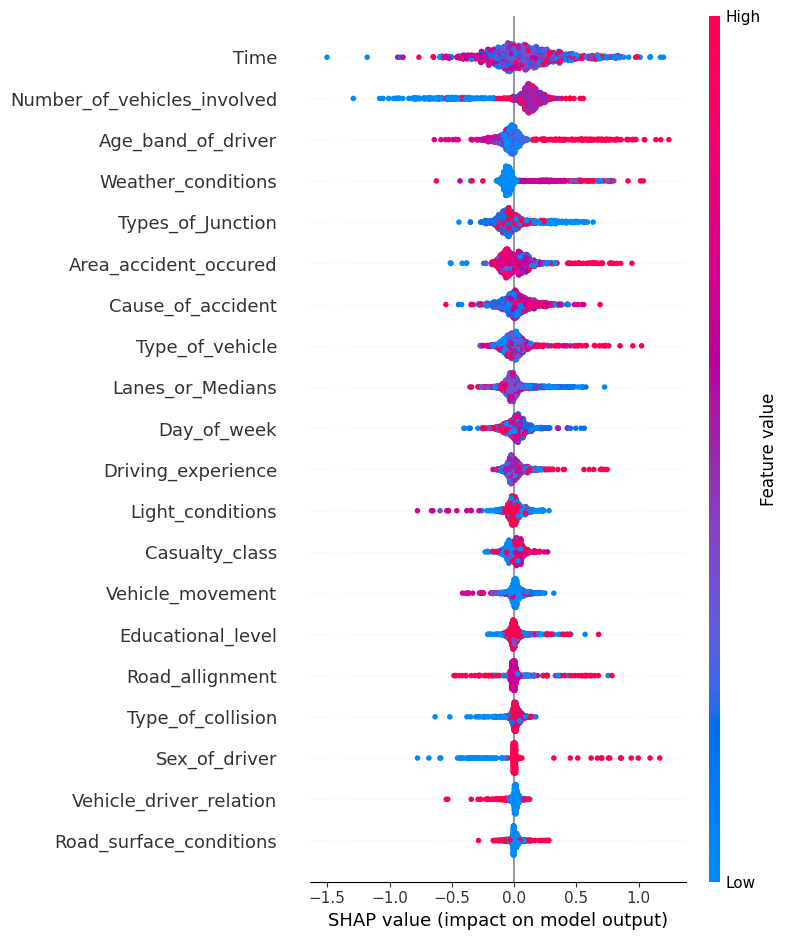

In [29]:
# Summary plot
shap.summary_plot(shap_values[:,:,2], feature_names=column_names, show=False)

# Save the plot
plt.savefig(os.path.join(save_dir, 'shap_summary_plot_class_2.png'), dpi=300)

plt.show()

In [33]:
# Force plot
shap.plots.force(shap_values[:,:,2], feature_names=column_names, show=False)

In [34]:
# Force plot
shap.plots.force(shap_values[8,:,2], feature_names=column_names, show=False)

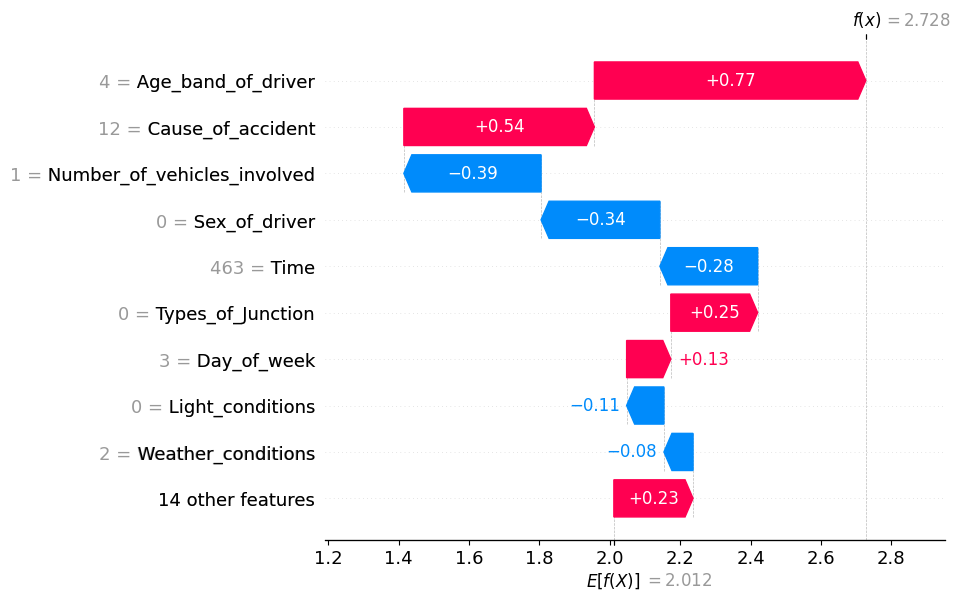

<Figure size 640x480 with 0 Axes>

In [35]:
# Waterfall Plot
shap.plots.waterfall(shap_values[500,:,2])

# Save the plot
plt.savefig(os.path.join(save_dir, 'shap_waterfall_plot_class_2.png'), bbox_inches='tight',dpi=300)
plt.show()

In [36]:
feature_columns = X_test_sample.columns

# Print feature index for each feature
for feature_index, feature_name in enumerate(feature_columns):
    print(f"{feature_name} : {feature_index}")

Time : 0
Day_of_week : 1
Age_band_of_driver : 2
Sex_of_driver : 3
Educational_level : 4
Vehicle_driver_relation : 5
Driving_experience : 6
Type_of_vehicle : 7
Area_accident_occured : 8
Lanes_or_Medians : 9
Road_allignment : 10
Types_of_Junction : 11
Road_surface_type : 12
Road_surface_conditions : 13
Light_conditions : 14
Weather_conditions : 15
Type_of_collision : 16
Number_of_vehicles_involved : 17
Vehicle_movement : 18
Casualty_class : 19
Casualty_severity : 20
Pedestrian_movement : 21
Cause_of_accident : 22


In [38]:
def plot_dependence(feature_index, itr_index, pred_class):
    shap.dependence_plot(
        feature_index,
        shap_values.values[:, :, pred_class],  # Assuming you want to plot the SHAP values for the first class
        X_test_sample,
        feature_names=X_test_sample.columns,
        interaction_index=itr_index,  # Set to "auto" to automatically choose the interaction feature
        show=False  # Set to True if you want to display the plot using matplotlib
    )

    name = 'dependency_plot_' + str(feature_index) + '_' + str(itr_index) + '.png'
    plt.savefig(os.path.join(save_dir, name), bbox_inches='tight',dpi=300)
    plt.show()

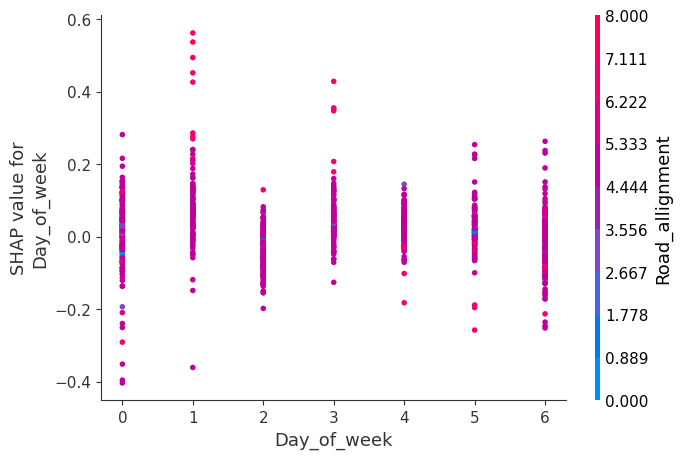

In [39]:
# Create a SHAP dependence plot
plot_dependence(1,10,2)